## **Machine Learning Project : Regression Analysis**

In [2]:
#STEP 1: IMPORT NECESSARY LIBRARIES

# import Data Manipulation library
import numpy as np 
import pandas as pd 
# import Data Visualization library 
import matplotlib.pyplot as plt 
import seaborn as sns 
# IMPORT warnings 
import warnings
warnings.filterwarnings('ignore')
import logging
logging.basicConfig(level= logging.INFO,
                    filemode= 'w',
                    format='%(asctime)s - %(message)s -%(levelname)s',
                    force = True,
                    filename= 'logs.log')
# import scikit-learn libraries 
from sklearn.preprocessing import LabelEncoder,MinMaxScaler,RobustScaler
from sklearn.model_selection import train_test_split
# metrics for regression analysis are as follows
''' 
1. r2_score 
2. mean_absolute_error
3. mean_squared_error
'''
from sklearn.metrics import r2_score,mean_absolute_error, mean_squared_error

# other important libraries
import time 


In [3]:
# STEP 2 : CREATE YOUR OWN DATA
# you can create your own dataset using numpy 
data=pd.DataFrame({
'feature1': np.random.randint(0,10000,1000),
'feature2': np.random.randint(0,30,1000),
'feature3': np.random.randint(20,10000,1000),
'target' :  np.random.randint(0,100,1000)
})

In [4]:
data.sample(frac=1)

,feature1,feature2,feature3,target
359,1872,22,1433,75
210,5546,24,2491,68
526,6731,8,8260,68
153,9331,22,7713,55
994,4899,25,1076,53
...,...,...,...,...
111,783,27,4564,15
899,5229,6,2933,11
353,9466,7,1063,82
15,6332,22,1216,19


In [5]:
# STEP 3 : CHECKING INFORMATION
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   feature1  1000 non-null   int32
 1   feature2  1000 non-null   int32
 2   feature3  1000 non-null   int32
 3   target    1000 non-null   int32
dtypes: int32(4)
memory usage: 15.8 KB


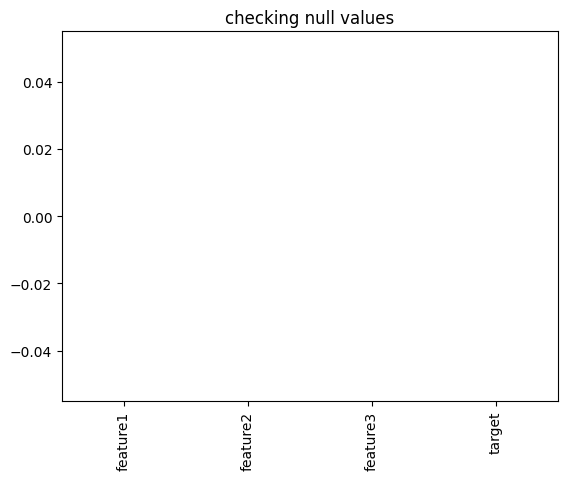

In [6]:
#STEP 4: CHECKING NULL VALUES
data.isnull().sum().plot(kind='bar')
plt.title('checking null values')
plt.show()


In [7]:
#STEP 5 : EDA : Exploratory data analysis 
from collections import OrderedDict
stats = []
for i in data.columns:  # data is declare dataset not any numerical col create
    numerical_stats = OrderedDict({
        'Features': i,
        'Mean':data[i].mean(),
        'Median':data[i].median(),
        'Min': data[i].min(),
        'Max': data[i].max(),
        'Q1': data[i].quantile(0.25),
        'Q3': data[i].quantile(0.75),
        'IQR': data[i].quantile(0.75)-data[i].quantile(0.25),
        'Standard Deviation': data[i].std(),
        'Skewness': data[i].skew(),
        'Kurtosis': data[i].kurt()

    })
    stats.append(numerical_stats)
    report=pd.DataFrame(stats)
report

,Features,Mean,Median,Min,Max,Q1,Q3,IQR,Standard Deviation,Skewness,Kurtosis
0,feature1,5317.225,5475.5,6,9993,3112.25,7734.0,4621.75,2813.273729,-0.127058,-1.091968
1,feature2,14.529,15.0,0,29,7.00,23.0,16.00,8.800717,-0.022595,-1.242144
2,feature3,5140.334,5221.5,30,9973,2630.00,7614.0,4984.00,2876.847830,-0.063061,-1.220619
3,target,50.451,51.0,0,99,26.75,73.0,46.25,28.073113,-0.033694,-1.145146


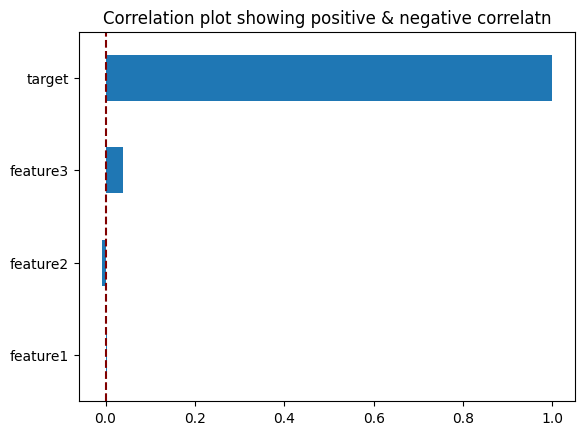

In [8]:
#step 6: checking correlation of feature w.r.t target column
data.corr()['target'].plot(kind ='barh')
plt.axvline(0,linestyle ='--',color='maroon')
plt.title('Correlation plot showing positive & negative correlatn')
plt.show()

In [ ]:
# Step 7 : model building 
# x is independant column
X = data.drop(columns= 'target', axis= 1 )
# y is dependent column
y = data['target']
# maximum value of random state is will be range will be (0 to 4294576)
''' 
Data split : 70% training data and 30% test data

'''
X_train, X_test,y_train,y_test= train_test_split(X,y,test_size=0.30,
                                                 random_state=2)
#scaling technique Min Max scalar 
# fit is always run on X training data 
''' 
X_train: seen data
X_test : unseen data use only transform
'''
sc =MinMaxScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
# linear regression model 
from sklearn.linear_model import LinearRegression
# y_train ans the data x_train que and ans the data
model_LR = LinearRegression().fit(X_train,y_train)
y_pred_LR = model_LR.predict(X_test)
r2_score(y_test,y_pred_LR)

-0.01328938709445393

In [11]:
# 
model_LR.coef_,model_LR.intercept_


(array([-3.47331864,  2.09656758,  2.69701483]), np.float64(50.40436664589819))

<Axes: xlabel='target'>

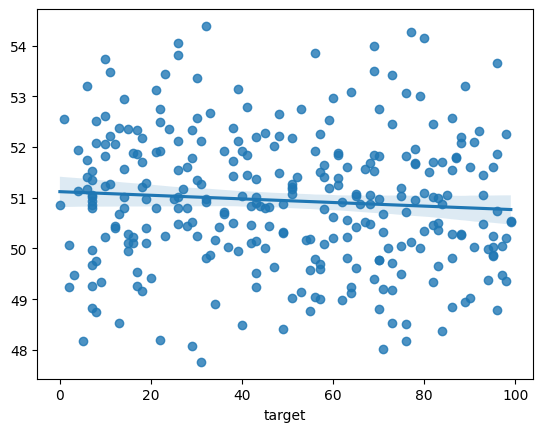

In [12]:
sns.regplot(x =y_test, y=y_pred_LR)


In [13]:
# Ridge Regression
from sklearn.linear_model import ridge_regression,Ridge,ElasticNet
ridge = Ridge().fit(X_train,y_train)
y_pred_ridge = ridge.predict(X_test)
r2_score(y_test,y_pred_ridge)

-0.013104251795267974

In [15]:
from sklearn.linear_model import Lasso
lasso = Lasso().fit(X_train,y_train)
y_pred_lasso = Lasso.predict (X_test)
r2_score(y_test,y_pred_lasso)

TypeError: LinearModel.predict() missing 1 required positional argument: 'X'

In [ ]:
# elastic net 
model_LR.coef_,model_LR.intercept_

(array([-3.9270011 ,  3.04061026, -4.65277878]), np.float64(52.42149928855333))

In [ ]:
# regression formula 
'''  
y = mx+c  (x is random value given in dataset columns) 
y is must be (target value) find wrt m and x which is contain dataset
y=m1*x1 + m2*x2 + m3*x3 + C
'''
data

,feature1,feature2,feature3,target
0,7538,24,1588,77
1,5020,17,3031,54
2,5706,8,7449,25
3,8785,9,6544,24
4,2003,14,1969,21
...,...,...,...,...
995,7166,17,6111,40
996,2288,11,7392,64
997,6047,16,625,53
998,1086,5,9071,71


In [ ]:
target = (-3.9270011 * 7538 )+(3.04061026 *24)+(-4.65277878 * 1588) + 52.4214992
# -3.92700 is coefficient and model intercept declare 
# wrt model_LR.coef_,model_LR.intercept_  this formula 

In [ ]:
target

-36864.950848911445